In [1]:
import numpy as np 
import pandas as pd 
import datetime
pd.options.mode.chained_assignment = None 

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
# Load the critical health data provided in the Wids dataset
critical_health_df = pd.read_csv('/kaggle/input/phase-ii-widsdatathon2022/critical_health/critical_health/dataset.csv')

In [3]:
critical_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 93 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Unnamed: 0                                                                     3140 non-null   int64  
 1   fips                                                                           3140 non-null   int64  
 2   TOT_POP                                                                        3140 non-null   int64  
 3   0-9                                                                            3140 non-null   int64  
 4   0-9 y/o % of total pop                                                         3140 non-null   float64
 5   10-19                                                                          3140 non-null   int64  
 6   10-19 y/o % of total pop

In [4]:
# Function to process the counties data

def process_counties(df):
    """
    Function to process county level death data. Takes an input dataframe having details of county wise death data and 
    the output is 2 processed dataframes having cummulative deaths overall and monthly. 
    """
    
    # Remove the rows where fips is na
    
    df = df.dropna(subset = ['fips'])
    
    # change the data type of fips column

#     df['fips'] = df['fips'].astype(str)

    # change the data type of date column

    df['date'] = pd.to_datetime(df['date'])

    # extract the month column

    df['month'] = df['date'].dt.month
    
    cummulative_monthly = df[['fips', 'cases', 'deaths', 'date', 'month']].groupby(['fips', 'month']).sum().reset_index()
    
    cummulative_all = df[['fips', 'cases', 'deaths', 'date']].groupby(['fips']).sum().reset_index()
    
    return cummulative_monthly, cummulative_all

In [5]:
# Load the 2020 us_counties covid death dataset

counties_death_2020 = pd.read_csv('/kaggle/input/coronavirus-covid19-data-in-the-united-states/us-counties-2020.csv')

# Load the 2021 us_counties covid death dataset

counties_death_2021 = pd.read_csv('/kaggle/input/coronavirus-covid19-data-in-the-united-states/us-counties-2021.csv')

# Load the 2022 us_counties covid death dataset

counties_death_2022 = pd.read_csv('/kaggle/input/coronavirus-covid19-data-in-the-united-states/us-counties-2022.csv')

In [6]:
counties_death_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884737 entries, 0 to 884736
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    884737 non-null  object 
 1   county  884737 non-null  object 
 2   state   884737 non-null  object 
 3   fips    876471 non-null  float64
 4   cases   884737 non-null  int64  
 5   deaths  865976 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 40.5+ MB


In [7]:
cum_monthly_2020, cum_all_2020 = process_counties(counties_death_2020)

In [8]:
cum_monthly_2021, cum_all_2021 = process_counties(counties_death_2021)

In [9]:
cum_monthly_2022, cum_all_2022 = process_counties(counties_death_2022)

In [10]:
cum_all_2020 = cum_all_2020.rename(columns = {'cases': 'cases_2020', 'deaths': 'deaths_2020'})

cum_all_2021 = cum_all_2021.rename(columns = {'cases': 'cases_2021', 'deaths': 'deaths_2021'})

cum_all_2022 = cum_all_2022.rename(columns = {'cases': 'cases_2022', 'deaths': 'deaths_2022'})

In [11]:
# Load the prison facilities dataset

prison_facilities = pd.read_csv('/kaggle/input/coronavirus-covid19-data-in-the-united-states/prisons/facilities.csv')

In [12]:
prison_facilities['facility_county_fips'].nunique()

1348

In [13]:
from functools import reduce

df_all = [critical_health_df, cum_all_2020, cum_all_2021, cum_all_2022]

df_merged = reduce(lambda left, right: pd.merge(left, right, on = 'fips'), df_all)

In [14]:
df_merged = df_merged.drop(columns = ['Unnamed: 0','Jan Precipitation / inch',
       'Feb Precipitation / inch', 'Mar Precipitation / inch',
       'Apr Precipitation / inch', 'May Precipitation / inch',
       'Jun Precipitation / inch', 'Jul Precipitation / inch',
       'Jan Temp AVG / F', 'Feb Temp AVG / F', 'Mar Temp AVG / F',
       'Apr Temp AVG / F', 'May Temp AVG / F', 'Jun Temp AVG / F',
       'Jul Temp AVG / F'])
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3131 entries, 0 to 3130
Data columns (total 84 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   fips                                                                           3131 non-null   int64  
 1   TOT_POP                                                                        3131 non-null   int64  
 2   0-9                                                                            3131 non-null   int64  
 3   0-9 y/o % of total pop                                                         3131 non-null   float64
 4   10-19                                                                          3131 non-null   int64  
 5   10-19 y/o % of total pop                                                       3131 non-null   float64
 6   20-29                   

In [15]:
df_merged.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '10-19',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop', '40-49',
       '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop',
       '60-69', '60-69 y/o % of total pop', '70-79',
       '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop',
       'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone',
       'Native American/American Indian-alone pop', '% NA/AI-alone',
       'Asian-alone pop', '% Asian-alone',
       'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone',
       'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018',
       'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018',
       'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018',
       'R_NET_MIG_2018', 'Less than a high school diploma 2014-18',
       'High school diploma only 2014-18',
       'S

In [16]:
import matplotlib.pyplot as plt

In [17]:
import seaborn as sns

# fig = plt.figure(figsize=(45,45), dpi = 480)
# sns.heatmap(df_merged.corr(), annot = True, fmt = '.2f')

In [18]:
# correlation with age

df_merged_age = df_merged[['TOT_POP', '0-9 y/o % of total pop', 
       '10-19 y/o % of total pop',  '20-29 y/o % of total pop',
        '30-39 y/o % of total pop', '40-49 y/o % of total pop', '50-59 y/o % of total pop',
        '60-69 y/o % of total pop',  '70-79 y/o % of total pop', '80+ y/o % of total pop',
        'Percent of Population Aged 60+', 'cases_2020',
       'deaths_2020', 'cases_2021', 'deaths_2021', 'cases_2022',
       'deaths_2022']]

fig = plt.figure(figsize=(20,20), dpi = 480)
sns.heatmap(df_merged_age.corr(), annot = True, fmt = '.2f', cmap="PiYG")

<AxesSubplot:>

In [19]:
df_age_unstack = pd.melt(df_merged_age, id_vars=['cases_2020',
       'deaths_2020', 'cases_2021', 'deaths_2021', 'cases_2022',
       'deaths_2022'], value_vars=[ '0-9 y/o % of total pop', 
       '10-19 y/o % of total pop',  '20-29 y/o % of total pop',
        '30-39 y/o % of total pop', '40-49 y/o % of total pop', '50-59 y/o % of total pop',
        '60-69 y/o % of total pop',  '70-79 y/o % of total pop', '80+ y/o % of total pop'])

In [20]:
df_age_unstack

cases_2020  deaths_2020  cases_2021  deaths_2021  cases_2022  \
0          370662       5683.0     2871893      41785.0     2184331   
1         1127507      12446.0     9751057     136369.0     7784667   
2          174840       2035.0      983791      22337.0      781257   
3          148219       2687.0     1144559      25347.0      899381   
4          349468       3855.0     2851498      52469.0     2094599   
...           ...          ...         ...          ...         ...   
28174      151156        768.0     1941247      19106.0     1546657   
28175      158919        317.0     1497429       3811.0     1382776   
28176      105421        502.0      993995       6213.0      790147   
28177       41244       1397.0      415974      10166.0      330338   
28178       27239         74.0      285924       2504.0      221400   

       deaths_2022                variable      value  
0          28493.0  0-9 y/o % of total pop  12.206615  
1          94956.0  0-9 y/o % of total pop  11.355276  
2          13486.0  0-9 y/o % of total pop  10.980266  
3          14572.0  0-9 y/o % of total pop  10.964286  
4          32858.0  0-9 y/o % of total pop  12.266598  
...            ...                     ...        ...  
28174      17681.0  80+ y/o % of total pop   2.204362  
28175       2260.0  80+ y/o % of total pop   2.846497  
28176       5411.0  80+ y/o % of total pop   2.497660  
28177       6200.0  80+ y/o % of total pop   5.732403  
28178       2539.0  80+ y/o % of total pop   5.683939  

[28179 rows x 8 columns]

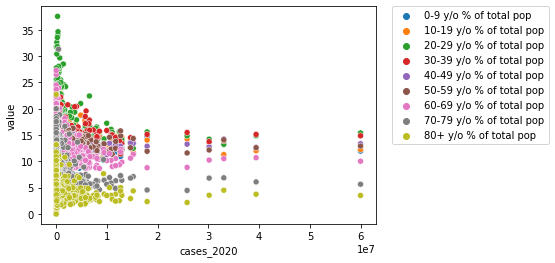

In [21]:
g = sns.scatterplot(x="cases_2020", y="value", hue='variable', data=df_age_unstack)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

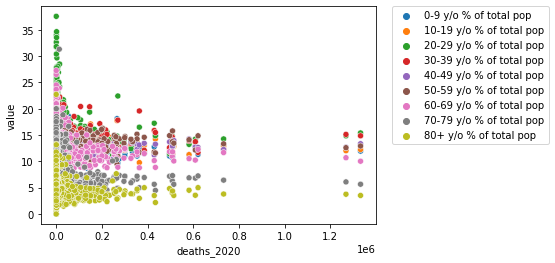

In [22]:
g = sns.scatterplot(x="deaths_2020", y="value", hue='variable', data=df_age_unstack)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

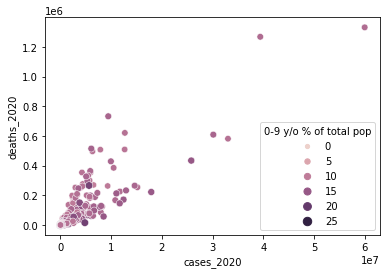

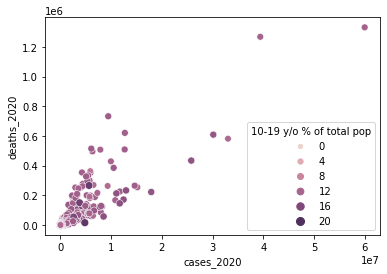

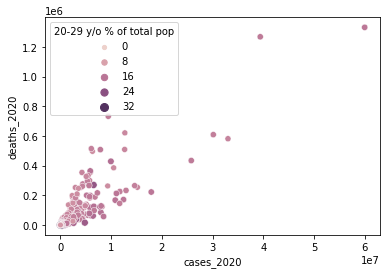

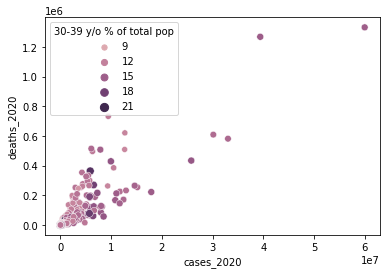

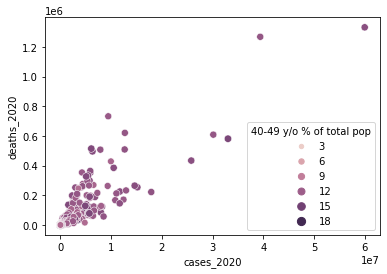

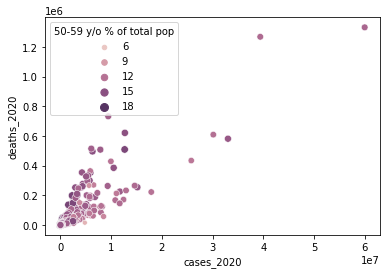

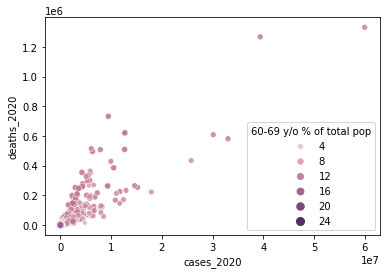

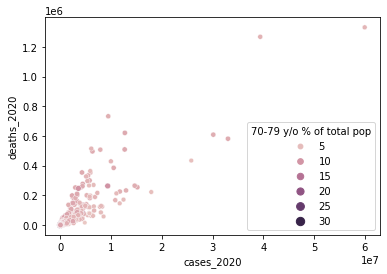

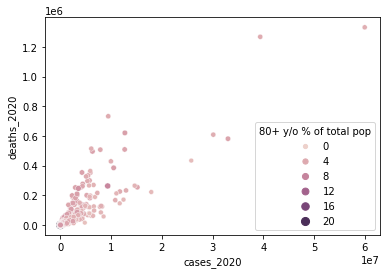

In [23]:
for x in df_merged_age[['0-9 y/o % of total pop', '10-19 y/o % of total pop',  '20-29 y/o % of total pop',
                        '30-39 y/o % of total pop', '40-49 y/o % of total pop', 
                        '50-59 y/o % of total pop','60-69 y/o % of total pop',  
                        '70-79 y/o % of total pop', '80+ y/o % of total pop']]:
    sns.scatterplot(data = df_merged_age, x = 'cases_2020', y = 'deaths_2020', hue = x, size = x)
    plt.show()

In [24]:
# correlation with race

df_merged_age = df_merged[['% White-alone', '% Black-alone', '% NA/AI-alone', '% Asian-alone',
        '% Hawaiian/PI-alone', '% Two or more races', 'POP_ESTIMATE_2018',
       'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018',
       'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018',
       'R_NET_MIG_2018',  'cases_2020',
       'deaths_2020', 'cases_2021', 'deaths_2021', 'cases_2022',
       'deaths_2022']]

fig = plt.figure(figsize=(20,20), dpi = 480)
sns.heatmap(df_merged_age.corr(), annot = True, fmt = '.2f', cmap="PiYG")

<AxesSubplot:>

In [25]:
df_merged.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '10-19',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop', '40-49',
       '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop',
       '60-69', '60-69 y/o % of total pop', '70-79',
       '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop',
       'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone',
       'Native American/American Indian-alone pop', '% NA/AI-alone',
       'Asian-alone pop', '% Asian-alone',
       'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone',
       'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018',
       'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018',
       'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018',
       'R_NET_MIG_2018', 'Less than a high school diploma 2014-18',
       'High school diploma only 2014-18',
       'S

In [26]:
df_merged_age = df_merged[['Active Physicians per 100000 Population 2018 (AAMC)',
       'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
       'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
       'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
       'Active General Surgeons per 100000 Population 2018 (AAMC)',
       'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)',
       'Total nurse practitioners (2019)', 'Total physician assistants (2019)',
       'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)',
       'Family Medicine/General Practice Primary Care (2019)',
       'Total Specialist Physicians (2019)', 'ICU Beds_x',  'cases_2020',
       'deaths_2020', 'cases_2021', 'deaths_2021', 'cases_2022',
       'deaths_2022']]

fig = plt.figure(figsize=(20,20), dpi = 480)
sns.heatmap(df_merged_age.corr(), annot = True, fmt = '.2f', cmap="PiYG")

<AxesSubplot:>